In [1]:
import pandas as pd
from datetime import timedelta
df = pd.read_csv('/mnt/cephfs/hadoop-compute/phoenix/jose.luis.gonzalez/BCAA/data_complete.csv')
df.replace('\\N', pd.NA, inplace=True)
df

,region,territory,country_name,workflow_uuid,driver_uuid,delivery_trip_uuid,courier_flow,restaurant_offered_timestamp_utc,order_final_state_timestamp_local,eater_request_timestamp_local,geo_archetype,merchant_surface,pickup_distance,dropoff_distance,ATD
0,Mexico,South East,Mexico,8c393c94-9282-41a6-a885-7a6e84b470d7,d16e401c-795d-4295-96c0-85ca08ad8c42,715f96aa-0a31-46f6-b856-6ea6f87affad,Motorbike,2025-04-06 19:35:50.000,2025-04-06 13:48:48,2025-04-06 13:35:50,Drive momentum,Tablet,0.643,1.651,12.966667
1,Mexico,South East,Mexico,b156dd16-274f-46d1-ac6f-4c24ca43df69,06299354-23ec-4173-83dc-d6bd32a420e1,ac985454-0e6f-4695-a68b-755c60c2afd7,Motorbike,2025-04-11 22:30:56.000,2025-04-11 16:47:48,2025-04-11 16:30:56,Drive momentum,Tablet,0.812,1.733,16.866667
2,Mexico,South East,Mexico,87a8081b-b735-4daf-8452-3943a9d9ca24,188214a6-3813-44d5-9694-0ae69dfdd7e5,14b274b9-924e-4da7-8803-69558a33559d,Motorbike,2025-04-06 23:15:05.000,2025-04-06 17:34:49,2025-04-06 17:15:05,Drive momentum,Tablet,1.966,1.605,19.733333
3,Mexico,South East,Mexico,78f0e92c-fa45-4215-8c3f-703b8691b6eb,5c7cbb34-116b-4665-aaf3-7f02394c0ff8,ee4faf69-bfff-421a-a163-29dfa4156fc4,Motorbike,2025-04-19 02:38:58.000,2025-04-18 21:21:55,2025-04-18 20:38:58,Drive momentum,Tablet,3.01,4.771,42.950000
4,Mexico,Central,Mexico,e0b2324b-f210-4e6b-82d1-979f9a208967,8b7a3bd8-9cf1-493e-9c64-303db8781045,7870b275-4541-4e09-8fe7-a47e7b506ce4,Motorbike,2025-03-03 03:33:40.000,2025-03-02 22:02:36,2025-03-02 21:33:40,Play offense,Tablet,0.746,4.37,28.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Mexico,West,Mexico,33ad3d4e-22d3-42e9-85fe-e3784775285c,e26664e4-1f01-4f94-94a7-a1c89354af51,aacc3600-8c49-4dc0-a797-ea7d83ce03d3,Motorbike,2025-03-29 03:58:35.000,2025-03-28 21:46:50,2025-03-28 20:58:35,Drive momentum,Tablet,3.843,1.135,48.250000
999996,Mexico,North,Mexico,7dc9ddb3-3754-48ea-8af5-ecdaf7000be8,85045b44-9c45-4462-9f06-73381b192e40,9e9c0b6f-a077-48c9-ad53-94fe371ab860,Logistics,2025-04-06 02:47:09.000,2025-04-05 21:26:17,2025-04-05 20:47:08,Play offense,Tablet,2.353,1.665,39.150000
999997,Mexico,South East,Mexico,e72cd1c7-44dd-4a45-afe5-25b385f07973,f0f6eb20-ffcb-4c93-af88-0d8fbb9bd5fa,31a12daf-50a2-44d0-a9c3-76c1bcc18373,Motorbike,2025-04-19 16:00:45.000,2025-04-19 12:09:16,2025-04-19 11:00:45,Drive momentum,Tablet,1.273,10.278,68.516667
999998,Mexico,South East,Mexico,569a9caf-35ab-4c0f-8298-b708353651b9,0e53ba98-d85c-45a5-a93b-08b128d97cf4,dcd4d029-5ed8-4614-9991-40ea257626aa,Motorbike,2025-03-16 20:33:31.000,2025-03-16 14:50:19,2025-03-16 14:33:30,Drive momentum,Web/Mobile,0.199,2.103,16.816667


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   region                             1000000 non-null  object 
 1   territory                          1000000 non-null  object 
 2   country_name                       1000000 non-null  object 
 3   workflow_uuid                      1000000 non-null  object 
 4   driver_uuid                        987450 non-null   object 
 5   delivery_trip_uuid                 1000000 non-null  object 
 6   courier_flow                       992451 non-null   object 
 7   restaurant_offered_timestamp_utc   999835 non-null   object 
 8   order_final_state_timestamp_local  1000000 non-null  object 
 9   eater_request_timestamp_local      1000000 non-null  object 
 10  geo_archetype                      1000000 non-null  object 
 11  merchant_surface         

In [3]:
# Filtrar filas con pickup o dropoff distance nulos
before = len(df)
df = df.dropna(subset=['pickup_distance', 'dropoff_distance','driver_uuid'])
after = len(df)

print(f"Filas eliminadas: {before - after} ({(before - after) / before:.2%})")
print(f"Filas: { after}")

Filas eliminadas: 15746 (1.57%)
Filas: 984254


In [4]:
cols_to_float = ["pickup_distance", "dropoff_distance"]
for col in cols_to_float:
    df[col] = pd.to_numeric(df[col], errors="coerce")
time_cols = [
    'restaurant_offered_timestamp_utc',
    'order_final_state_timestamp_local',
    'eater_request_timestamp_local'
]
for col in time_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
df = df.astype({col: "string" for col in df.select_dtypes(include=["object"]).columns})
df['restaurant_offered_timestamp_local'] = df['restaurant_offered_timestamp_utc'] - timedelta(hours=6)
df = df.drop(columns=['restaurant_offered_timestamp_utc'])
df

/tmp/ipykernel_118996/4114809976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors="coerce")
/tmp/ipykernel_118996/4114809976.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], errors='coerce')
/tmp/ipykernel_118996/4114809976.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,region,territory,country_name,workflow_uuid,driver_uuid,delivery_trip_uuid,courier_flow,order_final_state_timestamp_local,eater_request_timestamp_local,geo_archetype,merchant_surface,pickup_distance,dropoff_distance,ATD,restaurant_offered_timestamp_local
0,Mexico,South East,Mexico,8c393c94-9282-41a6-a885-7a6e84b470d7,d16e401c-795d-4295-96c0-85ca08ad8c42,715f96aa-0a31-46f6-b856-6ea6f87affad,Motorbike,2025-04-06 13:48:48,2025-04-06 13:35:50,Drive momentum,Tablet,0.643,1.651,12.966667,2025-04-06 13:35:50
1,Mexico,South East,Mexico,b156dd16-274f-46d1-ac6f-4c24ca43df69,06299354-23ec-4173-83dc-d6bd32a420e1,ac985454-0e6f-4695-a68b-755c60c2afd7,Motorbike,2025-04-11 16:47:48,2025-04-11 16:30:56,Drive momentum,Tablet,0.812,1.733,16.866667,2025-04-11 16:30:56
2,Mexico,South East,Mexico,87a8081b-b735-4daf-8452-3943a9d9ca24,188214a6-3813-44d5-9694-0ae69dfdd7e5,14b274b9-924e-4da7-8803-69558a33559d,Motorbike,2025-04-06 17:34:49,2025-04-06 17:15:05,Drive momentum,Tablet,1.966,1.605,19.733333,2025-04-06 17:15:05
3,Mexico,South East,Mexico,78f0e92c-fa45-4215-8c3f-703b8691b6eb,5c7cbb34-116b-4665-aaf3-7f02394c0ff8,ee4faf69-bfff-421a-a163-29dfa4156fc4,Motorbike,2025-04-18 21:21:55,2025-04-18 20:38:58,Drive momentum,Tablet,3.010,4.771,42.950000,2025-04-18 20:38:58
4,Mexico,Central,Mexico,e0b2324b-f210-4e6b-82d1-979f9a208967,8b7a3bd8-9cf1-493e-9c64-303db8781045,7870b275-4541-4e09-8fe7-a47e7b506ce4,Motorbike,2025-03-02 22:02:36,2025-03-02 21:33:40,Play offense,Tablet,0.746,4.370,28.933333,2025-03-02 21:33:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Mexico,West,Mexico,33ad3d4e-22d3-42e9-85fe-e3784775285c,e26664e4-1f01-4f94-94a7-a1c89354af51,aacc3600-8c49-4dc0-a797-ea7d83ce03d3,Motorbike,2025-03-28 21:46:50,2025-03-28 20:58:35,Drive momentum,Tablet,3.843,1.135,48.250000,2025-03-28 21:58:35
999996,Mexico,North,Mexico,7dc9ddb3-3754-48ea-8af5-ecdaf7000be8,85045b44-9c45-4462-9f06-73381b192e40,9e9c0b6f-a077-48c9-ad53-94fe371ab860,Logistics,2025-04-05 21:26:17,2025-04-05 20:47:08,Play offense,Tablet,2.353,1.665,39.150000,2025-04-05 20:47:09
999997,Mexico,South East,Mexico,e72cd1c7-44dd-4a45-afe5-25b385f07973,f0f6eb20-ffcb-4c93-af88-0d8fbb9bd5fa,31a12daf-50a2-44d0-a9c3-76c1bcc18373,Motorbike,2025-04-19 12:09:16,2025-04-19 11:00:45,Drive momentum,Tablet,1.273,10.278,68.516667,2025-04-19 10:00:45
999998,Mexico,South East,Mexico,569a9caf-35ab-4c0f-8298-b708353651b9,0e53ba98-d85c-45a5-a93b-08b128d97cf4,dcd4d029-5ed8-4614-9991-40ea257626aa,Motorbike,2025-03-16 14:50:19,2025-03-16 14:33:30,Drive momentum,Web/Mobile,0.199,2.103,16.816667,2025-03-16 14:33:31


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 984254 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   region                              984254 non-null  string        
 1   territory                           984254 non-null  string        
 2   country_name                        984254 non-null  string        
 3   workflow_uuid                       984254 non-null  string        
 4   driver_uuid                         984254 non-null  string        
 5   delivery_trip_uuid                  984254 non-null  string        
 6   courier_flow                        984246 non-null  string        
 7   order_final_state_timestamp_local   984254 non-null  datetime64[ns]
 8   eater_request_timestamp_local       984254 non-null  datetime64[ns]
 9   geo_archetype                       984254 non-null  string        
 10  merchant_surf

,order_final_state_timestamp_local,eater_request_timestamp_local,pickup_distance,dropoff_distance,ATD,restaurant_offered_timestamp_local
count,984254,984254,984254.000000,984254.000000,984254.000000,984249
mean,2025-03-28 00:23:01.511422720,2025-03-27 23:43:10.012266752,1.520211,4.110527,39.858319,2025-03-27 23:51:55.708753664
min,2025-03-01 00:14:14,2025-03-01 00:00:07,0.000000,0.000000,0.233333,2025-02-28 23:12:41
25%,2025-03-11 16:29:06.249999872,2025-03-11 15:55:29.500000,0.315000,1.877000,25.233333,2025-03-11 16:02:06
50%,2025-03-26 14:58:09,2025-03-26 14:21:21.500000,1.129000,3.333000,33.950000,2025-03-26 14:25:41
75%,2025-04-12 18:45:46.500000,2025-04-12 18:06:46.249999872,2.159000,5.556000,45.566667,2025-04-12 18:13:04
max,2025-04-28 14:31:25,2025-04-28 14:09:14,43.161000,123.586000,8515.700000,2025-04-28 13:25:42
std,NaN,NaN,1.584277,3.145090,59.591829,NaN


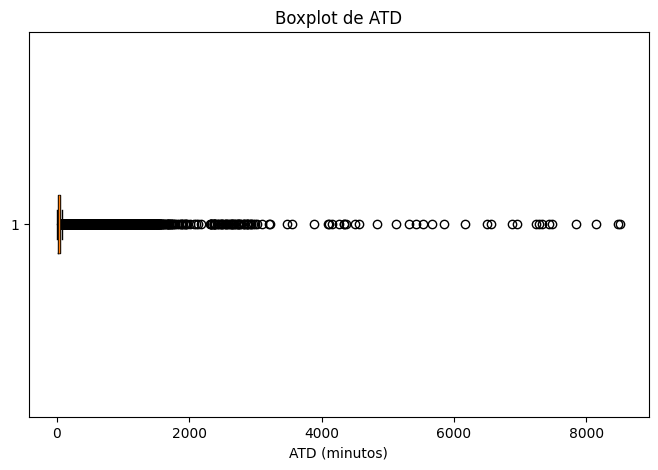

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.boxplot(df['ATD'], vert=False)
plt.title("Boxplot de ATD")
plt.xlabel("ATD (minutos)")
plt.show()


In [7]:
# Lista de columnas a filtrar
cols = ['ATD', 'pickup_distance', 'dropoff_distance']

for col in cols:
    q1, q3 = df[col].quantile([0.2, 0.8])
    iqr = q3 - q1
    upper_limit = q3 + 2.0 * iqr
    lower_limit = q1 - 2.0 * iqr  # opcional, para eliminar outliers bajos también
    
    # Filtrar filas dentro del rango permitido
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    
    print(f"{col}: se eliminaron outliers fuera del rango [{lower_limit:.2f}, {upper_limit:.2f}]")
df

ATD: se eliminaron outliers fuera del rango [-27.73, 100.18]
pickup_distance: se eliminaron outliers fuera del rango [-4.57, 7.17]
dropoff_distance: se eliminaron outliers fuera del rango [-7.56, 15.33]


,region,territory,country_name,workflow_uuid,driver_uuid,delivery_trip_uuid,courier_flow,order_final_state_timestamp_local,eater_request_timestamp_local,geo_archetype,merchant_surface,pickup_distance,dropoff_distance,ATD,restaurant_offered_timestamp_local
0,Mexico,South East,Mexico,8c393c94-9282-41a6-a885-7a6e84b470d7,d16e401c-795d-4295-96c0-85ca08ad8c42,715f96aa-0a31-46f6-b856-6ea6f87affad,Motorbike,2025-04-06 13:48:48,2025-04-06 13:35:50,Drive momentum,Tablet,0.643,1.651,12.966667,2025-04-06 13:35:50
1,Mexico,South East,Mexico,b156dd16-274f-46d1-ac6f-4c24ca43df69,06299354-23ec-4173-83dc-d6bd32a420e1,ac985454-0e6f-4695-a68b-755c60c2afd7,Motorbike,2025-04-11 16:47:48,2025-04-11 16:30:56,Drive momentum,Tablet,0.812,1.733,16.866667,2025-04-11 16:30:56
2,Mexico,South East,Mexico,87a8081b-b735-4daf-8452-3943a9d9ca24,188214a6-3813-44d5-9694-0ae69dfdd7e5,14b274b9-924e-4da7-8803-69558a33559d,Motorbike,2025-04-06 17:34:49,2025-04-06 17:15:05,Drive momentum,Tablet,1.966,1.605,19.733333,2025-04-06 17:15:05
3,Mexico,South East,Mexico,78f0e92c-fa45-4215-8c3f-703b8691b6eb,5c7cbb34-116b-4665-aaf3-7f02394c0ff8,ee4faf69-bfff-421a-a163-29dfa4156fc4,Motorbike,2025-04-18 21:21:55,2025-04-18 20:38:58,Drive momentum,Tablet,3.010,4.771,42.950000,2025-04-18 20:38:58
4,Mexico,Central,Mexico,e0b2324b-f210-4e6b-82d1-979f9a208967,8b7a3bd8-9cf1-493e-9c64-303db8781045,7870b275-4541-4e09-8fe7-a47e7b506ce4,Motorbike,2025-03-02 22:02:36,2025-03-02 21:33:40,Play offense,Tablet,0.746,4.370,28.933333,2025-03-02 21:33:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Mexico,West,Mexico,33ad3d4e-22d3-42e9-85fe-e3784775285c,e26664e4-1f01-4f94-94a7-a1c89354af51,aacc3600-8c49-4dc0-a797-ea7d83ce03d3,Motorbike,2025-03-28 21:46:50,2025-03-28 20:58:35,Drive momentum,Tablet,3.843,1.135,48.250000,2025-03-28 21:58:35
999996,Mexico,North,Mexico,7dc9ddb3-3754-48ea-8af5-ecdaf7000be8,85045b44-9c45-4462-9f06-73381b192e40,9e9c0b6f-a077-48c9-ad53-94fe371ab860,Logistics,2025-04-05 21:26:17,2025-04-05 20:47:08,Play offense,Tablet,2.353,1.665,39.150000,2025-04-05 20:47:09
999997,Mexico,South East,Mexico,e72cd1c7-44dd-4a45-afe5-25b385f07973,f0f6eb20-ffcb-4c93-af88-0d8fbb9bd5fa,31a12daf-50a2-44d0-a9c3-76c1bcc18373,Motorbike,2025-04-19 12:09:16,2025-04-19 11:00:45,Drive momentum,Tablet,1.273,10.278,68.516667,2025-04-19 10:00:45
999998,Mexico,South East,Mexico,569a9caf-35ab-4c0f-8298-b708353651b9,0e53ba98-d85c-45a5-a93b-08b128d97cf4,dcd4d029-5ed8-4614-9991-40ea257626aa,Motorbike,2025-03-16 14:50:19,2025-03-16 14:33:30,Drive momentum,Web/Mobile,0.199,2.103,16.816667,2025-03-16 14:33:31


In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 956028 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   region                              956028 non-null  string        
 1   territory                           956028 non-null  string        
 2   country_name                        956028 non-null  string        
 3   workflow_uuid                       956028 non-null  string        
 4   driver_uuid                         956028 non-null  string        
 5   delivery_trip_uuid                  956028 non-null  string        
 6   courier_flow                        956020 non-null  string        
 7   order_final_state_timestamp_local   956028 non-null  datetime64[ns]
 8   eater_request_timestamp_local       956028 non-null  datetime64[ns]
 9   geo_archetype                       956028 non-null  string        
 10  merchant_surf

,order_final_state_timestamp_local,eater_request_timestamp_local,pickup_distance,dropoff_distance,ATD,restaurant_offered_timestamp_local
count,956028,956028,956028.000000,956028.000000,956028.000000,956025
mean,2025-03-27 23:35:45.110925312,2025-03-27 22:59:29.381713408,1.441280,3.968771,36.262154,2025-03-27 23:05:51.200069632
min,2025-03-01 00:14:14,2025-03-01 00:00:07,0.000000,0.000000,0.233333,2025-02-28 23:12:41
25%,2025-03-11 15:53:30.500000,2025-03-11 15:19:19,0.308000,1.855000,25.000000,2025-03-11 15:26:01
50%,2025-03-26 14:19:43.500000,2025-03-26 13:43:58.500000,1.109000,3.279000,33.466667,2025-03-26 13:47:30
75%,2025-04-12 18:38:00,2025-04-12 17:59:41,2.104000,5.432000,44.516667,2025-04-12 18:04:57
max,2025-04-28 14:31:25,2025-04-28 14:09:14,7.172000,15.327000,100.183333,2025-04-28 13:25:42
std,NaN,NaN,1.400653,2.875661,15.505259,NaN


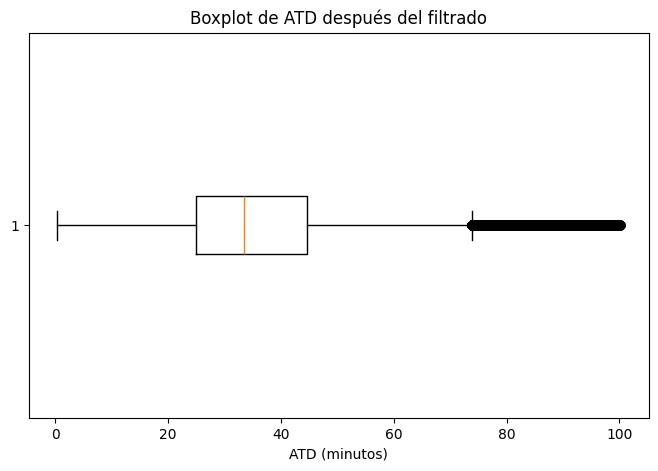

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.boxplot(df['ATD'], vert=False)
plt.title("Boxplot de ATD después del filtrado")
plt.xlabel("ATD (minutos)")
plt.show()


In [10]:
import numpy as np
import pandas as pd

# temporales
df['month'] = df['eater_request_timestamp_local'].dt.month
df['hour_of_day'] = df['eater_request_timestamp_local'].dt.hour
df['day_of_week'] = df['eater_request_timestamp_local'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# hora cíclica
df['hour_sin'] = np.sin(2*np.pi*df['hour_of_day']/24)
df['hour_cos'] = np.cos(2*np.pi*df['hour_of_day']/24)

# distancias derivadas
df['total_distance'] = df['pickup_distance'] + df['dropoff_distance']
df['drop_pick_ratio'] = df['dropoff_distance'] / (df['pickup_distance'] + 1e-6)

drop_cols = [
    'workflow_uuid','driver_uuid','delivery_trip_uuid',
    'restaurant_offered_timestamp_local','order_final_state_timestamp_local','eater_request_timestamp_local'
]
df_model = df.drop(columns=drop_cols)

y = df_model['ATD'].astype(float)
X = df_model.drop(columns=['ATD'])

cat_cols = ['region','territory','country_name','geo_archetype','merchant_surface','courier_flow']
num_cols = [
    'pickup_distance','dropoff_distance','total_distance','drop_pick_ratio',
    'hour_of_day','day_of_week','month','is_weekend','hour_sin','hour_cos'
]

for c in cat_cols:
    X[c] = X[c].astype('string')

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_hist_gradient_boosting  # noqa: F401
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False, min_frequency=100)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent", missing_values=pd.NA)),
    ("ohe", ohe)
])

preprocess = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols),
], remainder="drop")

hgb = HistGradientBoostingRegressor(
    learning_rate=0.08,
    max_depth=None,           
    max_leaf_nodes=31,
    min_samples_leaf=200,      
    l2_regularization=1.0,
    early_stopping=True,
    random_state=42
)

model = TransformedTargetRegressor(
    regressor=hgb,
    func=np.log1p,            
    inverse_func=np.expm1     
)

pipe = Pipeline([
    ("prep", preprocess),
    ("model", model)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, pred)
rmse = sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print(f"MAE:  {mae:.2f} min")
print(f"RMSE: {rmse:.2f} min")
print(f"R²:   {r2:.3f}")




/dsw/snapshots/d7ab82fb-7234-4725-8253-12d50237429b/python39/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


MAE:  9.47 min
RMSE: 12.83 min
R²:   0.314
